In [15]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('Data/city_hour.csv')

In [17]:
len(df)

707875

In [18]:
df.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

<AxesSubplot:>

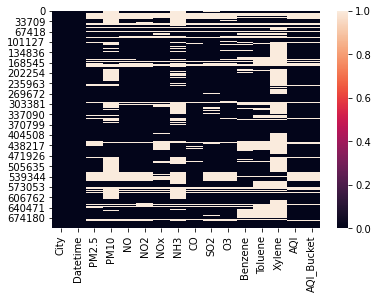

In [19]:
sns.heatmap(df.isnull())

## We will only consider Banglore data

In [20]:
blr = df[df['City'] == 'Bengaluru']

In [21]:
blr = blr.drop(labels=['City'],axis=1)

In [22]:
len(blr)

48192

In [23]:
blr.isnull().sum()

Datetime          0
PM2.5          4631
PM10          10987
NO              623
NO2             620
NOx            2088
NH3            7603
CO             4650
SO2             745
O3             5236
Benzene       10064
Toluene        7199
Xylene        48192
AQI            2695
AQI_Bucket     2695
dtype: int64

## We will remove Xylene feature as it is null at all times

In [24]:
blr = blr.drop(labels=['Xylene'],axis=1)

In [25]:
blr.isnull().sum()

Datetime          0
PM2.5          4631
PM10          10987
NO              623
NO2             620
NOx            2088
NH3            7603
CO             4650
SO2             745
O3             5236
Benzene       10064
Toluene        7199
AQI            2695
AQI_Bucket     2695
dtype: int64

<AxesSubplot:>

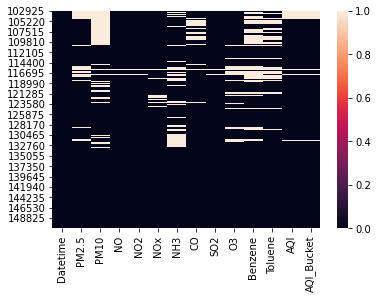

In [26]:
sns.heatmap(blr.isnull())

## Creating Time,Month,Day and Year features from Datetime feature

In [27]:
time = []
year = []
month = []
day = []
for i in range(len(blr)):
    data = blr.iloc[i,0]
    data_arr = data.split(" ")
    time.append(data_arr[1])
    data_arr = data_arr[0].split('-')
    year.append(data_arr[0])
    month.append(data_arr[1])
    day.append(data_arr[2])
blr['Time'] = time
blr['Day'] = day
blr['Month'] = month
blr['Year'] = year

In [30]:
blr.head()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Time,Day,Month,Year
102925,2015-01-01 01:00:00,NaN,NaN,2.04,12.40,7.58,19.10,0.19,4.05,12.41,0.56,3.43,NaN,NaN,01:00:00,01,01,2015
102926,2015-01-01 02:00:00,NaN,NaN,2.20,12.11,7.54,17.81,0.21,4.23,12.13,NaN,4.54,NaN,NaN,02:00:00,01,01,2015
102927,2015-01-01 03:00:00,NaN,NaN,1.66,10.82,6.52,17.42,0.30,4.28,13.13,NaN,4.20,NaN,NaN,03:00:00,01,01,2015
102928,2015-01-01 04:00:00,NaN,NaN,1.92,10.32,6.46,16.86,0.13,4.14,11.82,NaN,4.63,NaN,NaN,04:00:00,01,01,2015
102929,2015-01-01 05:00:00,NaN,NaN,1.94,9.82,6.22,16.35,0.15,4.26,10.31,NaN,3.91,NaN,NaN,05:00:00,01,01,2015


## Adding mean on that hour to missing values.

In [31]:
median_dict = {
    'PM2.5' : dict(),
    'PM10' : dict(),
    'NO' : dict(),
    'NO2' : dict(),
    'NOx' : dict(),
    'NH3' : dict(),
    'CO' : dict(),
    'SO2' : dict(),
    'O3' : dict(),
    'Benzene' : dict(),
    'Toluene' : dict(),
    'AQI' : dict()
}

In [32]:
cols = [col for col in blr.columns if col not in ['Datetime','AQI_Bucket','Time','Day','Month','Year']]
cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'AQI']

In [33]:
all_times = blr['Time'].unique()
all_times

array(['01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00',
       '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00',
       '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00',
       '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00',
       '21:00:00', '22:00:00', '23:00:00', '00:00:00'], dtype=object)

In [34]:
for col in cols:
    for time in all_times:
        median = blr[blr['Time']==time][col].dropna().median()
        median_dict[col][time] = median

In [35]:
blr_copy = blr.copy().reset_index(drop=True)

In [36]:
blr_copy.isnull().sum()

Datetime          0
PM2.5          4631
PM10          10987
NO              623
NO2             620
NOx            2088
NH3            7603
CO             4650
SO2             745
O3             5236
Benzene       10064
Toluene        7199
AQI            2695
AQI_Bucket     2695
Time              0
Day               0
Month             0
Year              0
dtype: int64

In [37]:
for col in cols:
    indices = blr_copy[blr_copy[col].isnull()].index
    for i in indices:
        time = blr_copy.at[i,'Time']
        blr_copy.at[i,col] = median_dict[col][time]

In [38]:
blr_copy.isnull().sum()

Datetime         0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI              0
AQI_Bucket    2695
Time             0
Day              0
Month            0
Year             0
dtype: int64

## Removing AQI_Bucket Attribute

In [39]:
blr_copy = blr_copy.drop(['AQI_Bucket'],axis=1)

## Saving Banglore data

In [40]:
blr_copy.to_csv(path_or_buf='Data/blr_city_data.csv',index=False)